In [131]:
#Importing libraries
import pandas as pd 
import numpy as np 

from statsmodels.formula.api import ols

import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

In [132]:
#Importing the datasets
df_mar = pd.read_csv('marathon_results_2015.csv')
df_mar19 = pd.read_csv('Boston2019.csv')
df_mar.head()

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,...,1:16:07,1:32:00,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1,1
1,1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,...,1:16:07,1:31:59,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2,2
2,2,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,NaN,...,1:16:07,1:32:00,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3,3
3,3,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,NaN,...,1:16:07,1:32:00,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4,4
4,4,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,...,1:16:07,1:32:00,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5,5


In [133]:
df_mar19.head()

,Rank_Tot,Age,Gender,Country,Result_hr,Result_sec,Rank_Gender,Country_code
0,1,30,M,Kenya,2:07:57,7677,1,KEN
1,2,29,M,Ethiopia,2:07:59,7679,2,ETH
2,3,34,M,Kenya,2:08:07,7687,3,KEN
3,4,32,M,Kenya,2:08:54,7734,4,KEN
4,5,26,M,Kenya,2:08:55,7735,5,KEN


## EDA 

Marathon dataset 2015

In [134]:
#Listing the columns in the dataset 
df_mar.columns

Index(['Unnamed: 0', 'Bib', 'Name', 'Age', 'M/F', 'City', 'State', 'Country',
       'Citizen', 'Unnamed: 9', '5K', '10K', '15K', '20K', 'Half', '25K',
       '30K', '35K', '40K', 'Pace', 'Proj Time', 'Official Time', 'Overall',
       'Gender', 'Division'],
      dtype='object')

In [135]:
#Datatypes of columns in the dataset
df_mar.dtypes

Unnamed: 0        int64
Bib              object
Name             object
Age               int64
M/F              object
City             object
State            object
Country          object
Citizen          object
Unnamed: 9       object
5K               object
10K              object
15K              object
20K              object
Half             object
25K              object
30K              object
35K              object
40K              object
Pace             object
Proj Time        object
Official Time    object
Overall           int64
Gender            int64
Division          int64
dtype: object

In [136]:
#Statistically describing all the numerical columns in the dataset 
df_mar.describe().round(2)

,Unnamed: 0,Age,Overall,Gender,Division
count,26598.00,26598.00,26598.00,26598.00,26598.00
mean,13298.50,42.14,13299.50,6711.79,1654.04
std,7678.33,11.29,7678.33,3944.25,1477.11
min,0.00,18.00,1.00,1.00,1.00
25%,6649.25,33.00,6650.25,3325.25,518.00
50%,13298.50,42.00,13299.50,6650.00,1205.00
75%,19947.75,50.00,19948.75,9974.75,2268.00
max,26597.00,82.00,26598.00,14581.00,6004.00


In [137]:
#Listing the first 10 rows in the "Age" column
df_mar['Age'][:10]

0    25
1    30
2    29
3    28
4    32
5    30
6    32
7    39
8    27
9    33
Name: Age, dtype: int64

In [138]:
#Third row in the 'Age' column
df_mar.loc[2,'Age']
#df_mar.iloc[1]

29

<AxesSubplot:title={'center':'Age'}>

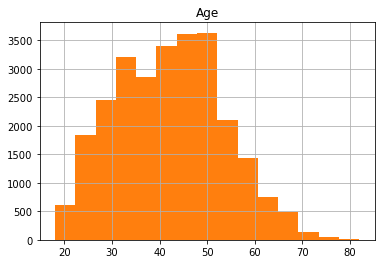

In [139]:
#Two ways to make a histogram using pandas library for a specific column
df_mar.hist('Age',bins=15)
df_mar['Age'].hist(bins=15)

In [140]:
#Using a list to show the first 10 rows of specific columns
df_mar[['Name','Age','M/F']].head()

,Name,Age,M/F
0,"Desisa, Lelisa",25,M
1,"Tsegay, Yemane Adhane",30,M
2,"Chebet, Wilson",29,M
3,"Kipyego, Bernard",28,M
4,"Korir, Wesley",32,M


In [141]:
#Using the .loc function to show the fifth row of these columns 
df_mar.loc[4,['Name','Age','M/F']]

Name    Korir, Wesley
Age                32
M/F                 M
Name: 4, dtype: object

In [142]:
#Showing the maximum value in the 'Age' column
df_mar['Age'].max()

82

In [143]:
#Using .agg function to show the min and max values in the 'Age' columns
df_mar['Age'].agg(['min','max'])

min    18
max    82
Name: Age, dtype: int64

In [144]:
df_mar['M/F']

0        M
1        M
2        M
3        M
4        M
        ..
26593    F
26594    F
26595    F
26596    M
26597    M
Name: M/F, Length: 26598, dtype: object

In [145]:
#Cleaning up the dataset 
df_mar[['Unnamed: 0','Unnamed: 9']].head()

,Unnamed: 0,Unnamed: 9
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN


In [146]:
#Checking if the length of the df is equal to the length of the column and the index of the df 
len(df_mar)==((df_mar['Unnamed: 0']==df_mar.index)).sum()

True

In [147]:
#It is safe to delete the dataframe, so we will do so using the del function 
del df_mar['Unnamed: 0']

In [148]:
#Checking for the other column as well 
print(sum(df_mar['Unnamed: 9'].isnull()),len(df_mar))

26531 26598


In [149]:
#Looking at the non-null values in the dataset 
df_mar[df_mar['Unnamed: 9'].notnull()].head()

,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,5K,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
1669,3207,"Balcom, Donald C.",41,M,Hollywood,MD,USA,NaN,VI,0:21:23,...,1:44:29,2:05:28,2:26:50,2:47:02,0:06:43,-,2:55:45,1670,1582,204
2251,3310,"Bryant, Andrew V.",33,M,Woodinville,WA,USA,NaN,MI,0:21:05,...,1:45:20,2:06:35,2:28:02,2:48:52,0:06:49,-,2:58:31,2252,2129,1606
5476,6938,"Oliver, Matthew",26,M,Santee,CA,USA,NaN,VI,0:22:30,...,1:52:26,2:15:49,2:39:54,3:03:40,0:07:24,-,3:13:43,5477,4877,2968
6327,12403,"Brand, Thomas R.",31,M,Andover,MA,USA,NaN,VI,0:22:53,...,1:54:21,2:18:24,2:43:04,3:07:13,0:07:32,-,3:17:21,6328,5492,3132
7303,10099,"Hunter, Richard E.",47,M,Folsom,CA,USA,NaN,VI,0:23:24,...,1:56:07,2:20:14,2:45:00,3:09:59,0:07:41,-,3:21:12,7304,6129,1007


In [150]:
df_mar[df_mar['Unnamed: 9'].notnull()]['Unnamed: 9'].values

array(['VI', 'MI', 'VI', 'VI', 'VI', 'MI', 'VI', 'MI', 'VI', 'VI', 'VI',
       'VI', 'VI', 'VI', 'VI', 'VI', 'VI', 'VI', 'VI', 'VI', 'MI', 'VI',
       'VI', 'VI', 'MI', 'MI', 'VI', 'VI', 'MI', 'VI', 'VI', 'MI', 'MI',
       'MI', 'VI', 'VI', 'MI', 'MI', 'VI', 'VI', 'VI', 'MI', 'VI', 'VI',
       'VI', 'MI', 'MI', 'MI', 'MI', 'VI', 'VI', 'MI', 'MI', 'MI', 'MI',
       'VI', 'MI', 'VI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI', 'MI',
       'MI'], dtype=object)

In [151]:
df_mar[df_mar['Age'] > 80].shape

(6, 24)

In [152]:
df_mar[df_mar['Age'] > 75][['Name','Age','City','Country','Official Time']]

,Name,Age,City,Country,Official Time
11886,"Taivassalo, Keijo K.",76,Thornhill,CAN,3:35:21
18655,"Burgasser, Joseph M",76,St Petersburg,USA,3:58:57
19583,"Gornish, Jerry",77,Bala Cynwyd,USA,4:04:10
19743,"Cerminaro, Anthony J. Sr.",78,Jermyn,USA,4:05:03
19984,"Meyrat, Danilo",78,Muriaux,SUI,4:06:40
21625,"Wilson, Harold",82,Tyler,USA,4:18:00
21976,"Miller, Gerald W",78,Calgary,CAN,4:21:05
22161,"Polidori, Peter J",77,Bingham Farms,USA,4:22:27
22195,"Ichida, Susumu",77,Tokyo,JPN,4:22:41
22267,"Iffrig, William G.",80,Lake Stevens,USA,4:23:13


In [153]:
df_mar[(df_mar['Age']> 80)&(df_mar['Country']=="USA")][['Name','Age','City','Country','Official Time']]

,Name,Age,City,Country,Official Time
21625,"Wilson, Harold",82,Tyler,USA,4:18:00
22645,"Schleisman, Jim T",81,Jefferson,USA,4:26:49
25685,"Sime, Colben K",81,Sunriver,USA,5:20:49
25691,"Marrin, Thomas H.",82,Fremont,USA,5:20:55
26410,"Beiers, Katherine",82,Santa Cruz,USA,5:53:40
26487,"Green, Jimmy",82,Marblehead,USA,5:57:54


In [154]:
#Creating a function to convert the datetime columns to minutes 
def to_minutes(row):
    x = row.split(":")
    return (int(x[0]) * 3600 + int(x[1]) * 60 + int(x[0])) / 60

In [155]:
df_mar['TimeInMinutes'] = df_mar['Official Time'].apply(to_minutes)

In [156]:
df_mar[['Official Time','TimeInMinutes']]

,Official Time,TimeInMinutes
0,2:09:17,129.033333
1,2:09:48,129.033333
2,2:10:22,130.033333
3,2:10:47,130.033333
4,2:10:49,130.033333
...,...,...
26593,7:38:56,458.116667
26594,7:51:30,471.116667
26595,7:59:33,479.116667
26596,8:00:37,480.133333


In [157]:
#Calculating the Pace of all the participants in the marathon 
df_mar['Pace'] = df_mar['TimeInMinutes']/26.2

In [158]:
df_mar['Pace'].describe()

count    26598.000000
mean         8.625546
std          1.545006
min          4.924936
25%          7.559160
50%          8.360687
75%          9.391858
max         18.554707
Name: Pace, dtype: float64

<AxesSubplot:>

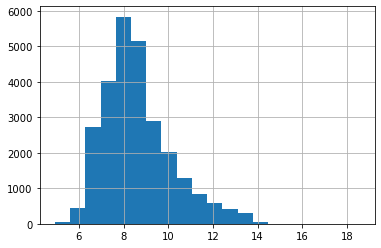

In [159]:
df_mar['Pace'].hist(bins=20)

In [160]:
fast = df_mar[(df_mar['Age']>75)]['Pace'].min()
df_mar[(df_mar['Age']>75)&(df_mar['Pace']==fast)]

,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,5K,...,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division,TimeInMinutes
11886,20278,"Taivassalo, Keijo K.",76,M,Thornhill,ON,CAN,NaN,NaN,0:25:25,...,2:31:34,2:58:15,3:24:16,8.208015,-,3:35:21,11887,8510,1,215.05


8:13 minutes per mile pace

In [161]:
df_mar['State'].isnull().sum()

2551

In [162]:
df_mar['State'].describe()

count     24047
unique       69
top          MA
freq       4694
Name: State, dtype: object

In [163]:
df_mar['State'].unique()

array([nan, 'MI', 'CA', 'OR', 'CO', 'AZ', 'MO', 'CT', 'QC', 'MA', 'NC',
       'IL', 'NY', 'WA', 'MD', 'NH', 'IA', 'VA', 'PA', 'NJ', 'WI', 'SC',
       'TX', 'OH', 'TN', 'MN', 'FL', 'GA', 'AL', 'HI', 'RI', 'ME', 'OK',
       'UT', 'AB', 'IN', 'DC', 'PE', 'ON', 'KS', 'VT', 'BC', 'ID', 'NE',
       'AK', 'NV', 'KY', 'ND', 'NM', 'AR', 'WV', 'LA', 'NS', 'NB', 'DE',
       'MT', 'SD', 'NL', 'WY', 'MS', 'MB', 'PR', 'NT', 'GU', 'AP', 'SK',
       'AE', 'YT', 'AA', 'VI'], dtype=object)

In [164]:
states = df_mar[df_mar['State'].notnull()]

In [165]:
states.groupby('State')[['Age','Pace']].mean().round(2).head()

,Age,Pace
State,,
AA,35.33,8.22
AB,44.33,8.21
AE,38.33,8.81
AK,44.86,7.98
AL,43.37,8.22


In [166]:
avg = states[['State','Pace','Age']].groupby('State',as_index=False).mean()
avg

,State,Pace,Age
0,AA,8.220738,35.333333
1,AB,8.213565,44.329787
2,AE,8.806298,38.333333
3,AK,7.975312,44.857143
4,AL,8.218713,43.365385
...,...,...,...
64,WA,8.338330,43.856833
65,WI,8.252434,41.818616
66,WV,8.149947,43.434783
67,WY,8.540712,42.190476


In [167]:
avg.sort_values(by='Pace')

,State,Pace,Age
43,NT,7.177163,41.000000
5,AP,7.673664,41.500000
53,QC,7.897842,45.262664
3,AK,7.975312,44.857143
12,DC,8.025204,35.837349
...,...,...,...
56,SD,8.877226,42.805556
62,VI,9.047710,50.000000
38,NH,9.065130,42.256560
54,RI,9.158917,40.371622


## EDA 

Marathon dataset 2019

In [168]:
df_mar19.columns

Index(['Rank_Tot', 'Age', 'Gender', 'Country', 'Result_hr', 'Result_sec',
       'Rank_Gender', 'Country_code'],
      dtype='object')

In [169]:
df_mar19['Country'].unique()

array(['Kenya', 'Ethiopia', 'United States', 'Japan', 'Eritrea',
       'Morocco', 'United Kingdom', 'Canada', 'Jordan', 'Australia',
       'Germany', 'New Zealand', 'China', 'Dominican Republic', 'Israel',
       'Argentina', 'Brazil', 'Turkey', 'France', 'Peru', 'Chile',
       'Denmark', 'Poland', 'Norway', 'Finland', 'Portugal', 'Iceland',
       'Latvia', 'Mexico', 'Colombia', 'Ireland', 'Trinidad and Tobago',
       'Belgium', 'Hong Kong', 'Ecuador', 'Italy', 'Costa Rica', 'Taiwan',
       'Spain', 'Estonia', 'Switzerland', 'Palestine', 'Venezuela',
       'Czech Republic', 'Guatemala', 'Russia', 'Sweden', 'Netherlands',
       'India', 'Philippines', 'South Africa', 'Singapore', 'Puerto Rico',
       'Luxembourg', 'Hungary', 'Austria', 'Lithuania', 'Panama',
       'Ukraine', 'Belarus', 'Greece', 'Korea, Republic of', 'Egypt',
       'Slovenia', 'Kazakhstan', 'Malaysia', 'Slovakia', 'El Salvador',
       'Guyana', 'Thailand', 'Cyprus', 'Nepal', 'Moldova', 'Macao',
       'Boliv

In [170]:
df_mar19['Result_sec']

0         7677
1         7679
2         7687
3         7734
4         7735
         ...  
26646    22879
26647    22947
26648    23750
26649    24818
26650    25197
Name: Result_sec, Length: 26651, dtype: int64

In [171]:
df_mar19['Result_min'] = df_mar19['Result_sec'] / 60
df_mar19['Result_min']

0        127.950000
1        127.983333
2        128.116667
3        128.900000
4        128.916667
            ...    
26646    381.316667
26647    382.450000
26648    395.833333
26649    413.633333
26650    419.950000
Name: Result_min, Length: 26651, dtype: float64

In [172]:
#Pace in 

## Simple Linear Regression Model 

In [173]:
model = ols(formula = 'Pace ~ Age', data = df_mar).fit() 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Pace   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     1440.
Date:                Fri, 22 Dec 2023   Prob (F-statistic):          6.18e-307
Time:                        21:46:42   Log-Likelihood:                -48610.
No. Observations:               26598   AIC:                         9.722e+04
Df Residuals:                   26596   BIC:                         9.724e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.3189      0.036    205.324      0.000       7.249       7.389
Age            0.0310      0.001     37.949      0.000       0.029       0.033
==============================================================================
Omnibus:                     4623.888   Durbin-Watson:                   0.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7999.389
Skew:                           1.135   Prob(JB):                         0.00
Kurtosis:                       4.437   Cond. No.                         169.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""